In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import norm

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## Resources

http://stackoverflow.com/questions/13865596/quantile-quantile-plot-using-scipy

I just need a bit more text here for checking the mobile CSS.

In [2]:
def percentile(data, p):
    """Returns the value of the p-ith percentile for the given dataset
    
    Taken from this paper: http://stanford.io/2bk0k8u
    
    """
    data = sorted(data)

    if p >= 100:
        return data[-1]

    n = len(data)
    i = (n*p)/100.0 + 0.5
    
    # If the index is an interger value, return the corresponding
    # value in the dataset as x. Otherwise, interoplate x.
    if int(i) == i:
        i = int(i) - 1 if int(i) - 1 > 0 else int(i)
        x = data[i]
    else:
        k = int(i) - 1 if int(i) - 1 > 0 else int(i)
        f = i - int(i)
        x = (1 - f)*data[k] + f*data[k + 1]
    
    return x

In [5]:
test_data = [5, 1, 9, 3, 14, 9, 7]
for i in range(1, 101):
    print(percentile(test_data, i))

2.14
2.28
2.42
2.5599999999999996
2.6999999999999997
2.84
2.9799999999999995
3.12
3.26
3.4000000000000004
3.54
3.6799999999999997
3.8200000000000003
3.96
4.1
4.24
4.38
4.52
4.66
4.800000000000001
4.9399999999999995
3.08
3.2200000000000006
3.3599999999999994
3.5
3.6400000000000006
3.7799999999999994
3.92
4.06
4.2
4.34
4.48
4.620000000000001
4.76
4.9
5.040000000000001
5.18
5.32
5.46
5.6
5.74
5.88
6.02
6.16
6.299999999999999
6.4399999999999995
6.58
6.720000000000001
6.860000000000001
7
7.140000000000001
7.280000000000001
7.42
7.559999999999999
7.699999999999999
7.84
7.98
8.12
8.26
8.4
8.54
8.68
8.82
8.96
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.15
9.499999999999998
9.85
10.200000000000001
10.549999999999997
10.899999999999999
11.25
11.599999999999998
11.95
12.3
12.650000000000002
13.0
13.350000000000001
13.700000000000003


IndexError: list index out of range

In [6]:
percentile(test_data, 100)

14

In [7]:
def qqplot(data):
    x = [norm.ppf(p) for p in np.arange(0.0, 1.01, 0.01)]
    y = [percentile(data, p) for p in np.arange(0, 101, 1)]
    plt.scatter(x, y)
    
    qqline(data)
    
    # Add the regression line
#     y = np.percentile(data, 25), np.percentile(data, 75)
#     x = 

In [10]:
qqplot(test_data)

IndexError: list index out of range

In [14]:
def qqline(data, step=0.01):
    # Calculate the slope and intercept of the...
    y = np.array([np.percentile(data, 25), np.percentile(data, 75)])
    x = np.array([norm.ppf(0.25), norm.ppf(0.75)])
    m = np.diff(y)/np.diff(x)
    b = y[0] - m * x[0]

    # Plot the line with a generated set of x values
    x = np.array([norm.ppf(p) for p in np.arange(0.0, 1.01, step)])
    #x = np.array([norm.ppf(percentileofscore(data, s) * 100) for s in sorted(data)])
    #m, b = np.polyfit(x, data, 1)
    plt.plot(x, x * m + b, 'black')
    

In [15]:
def qqplot(data):
#     x = [norm.ppf(0.00000001)] + \
#         [norm.ppf(p) for p in np.arange(0.01, 1.0, 0.01)] + \
#         [norm.ppf(0.99999999)]
    x = [norm.ppf(p) for p in np.arange(0.0, 1.01, 0.01)]

    y = [np.percentile(data, p * 100) for p in np.arange(0, 1.01, 0.01)]
    plt.scatter(x, y)
    
    qqline(data)
    
    # Add the regression line
#     y = np.percentile(data, 25), np.percentile(data, 75)
#     x = 

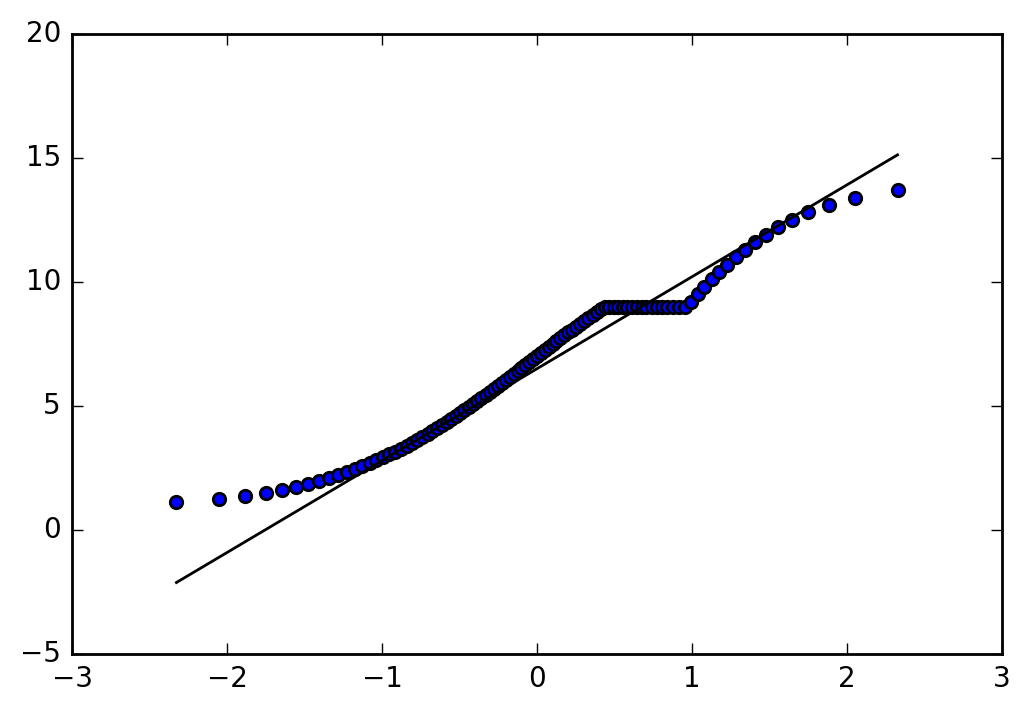

In [16]:
qqplot(test_data)

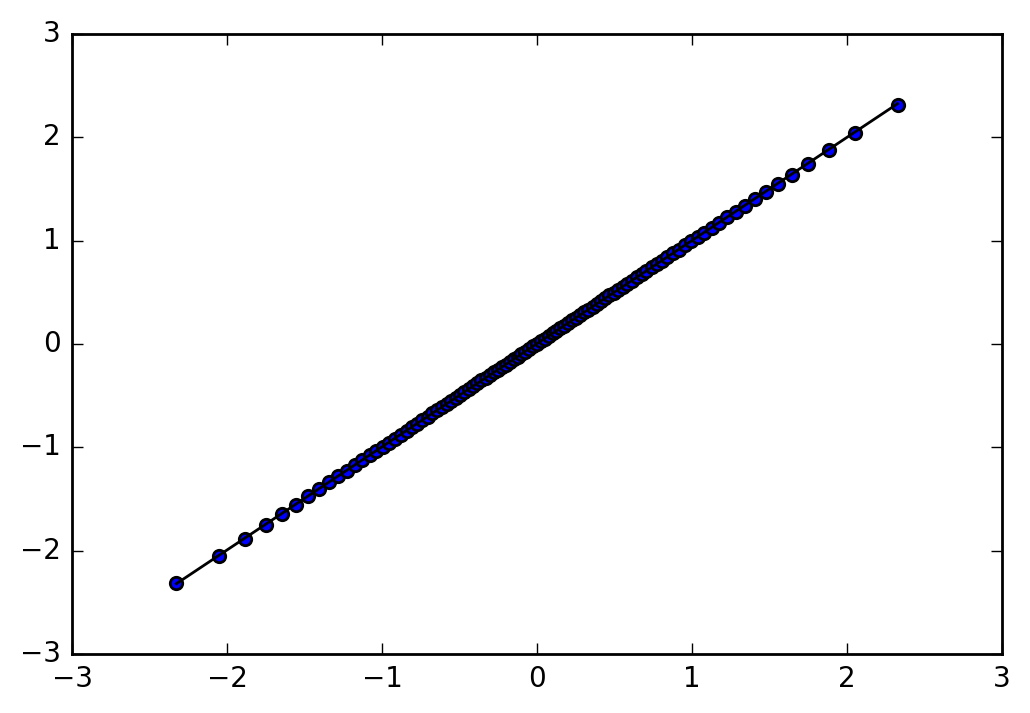

In [17]:
qqplot(np.random.randn(100000))

In [18]:
def qqplot(data):
    sample = np.random.randn(100000)
    x = [np.percentile(sample, p * 100) for p in np.arange(0, 1.01, 0.01)]
    y = [np.percentile(data, p * 100) for p in np.arange(0, 1.01, 0.01)]
    plt.scatter(x, y)


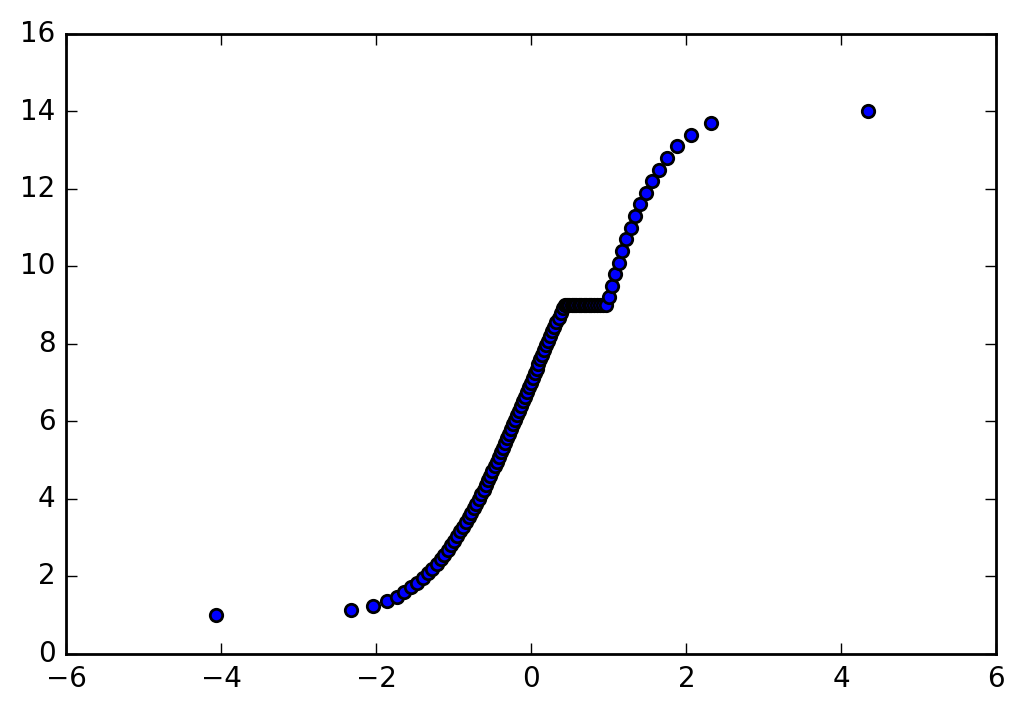

In [20]:
qqplot(test_data)

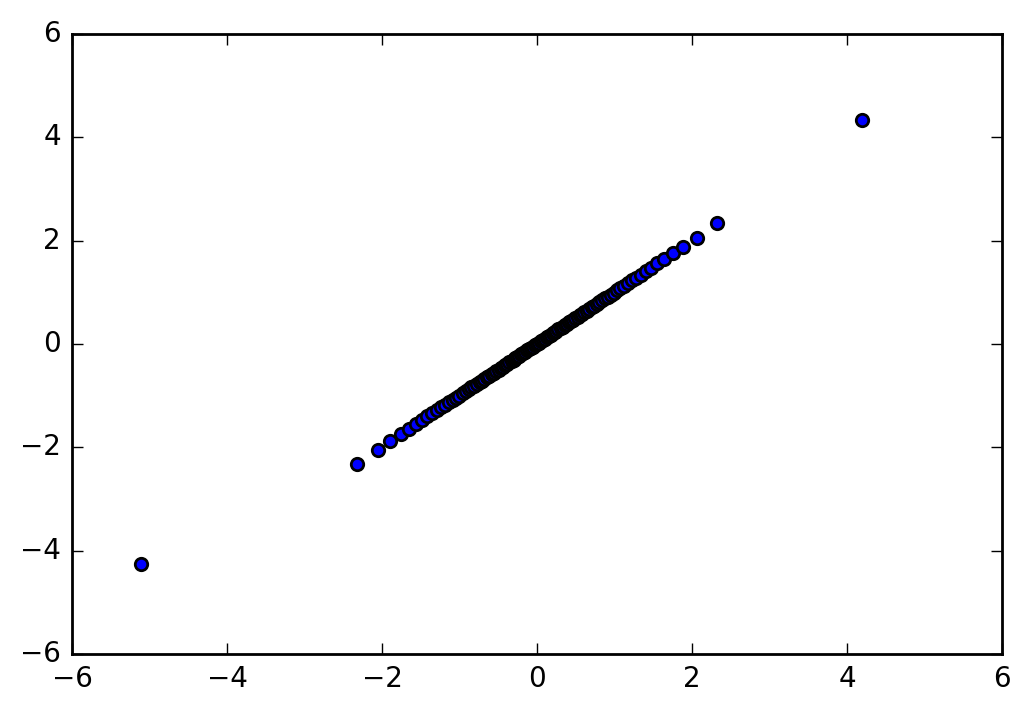

In [21]:
qqplot(np.random.randn(100000))

In [22]:
from scipy.stats import probplot

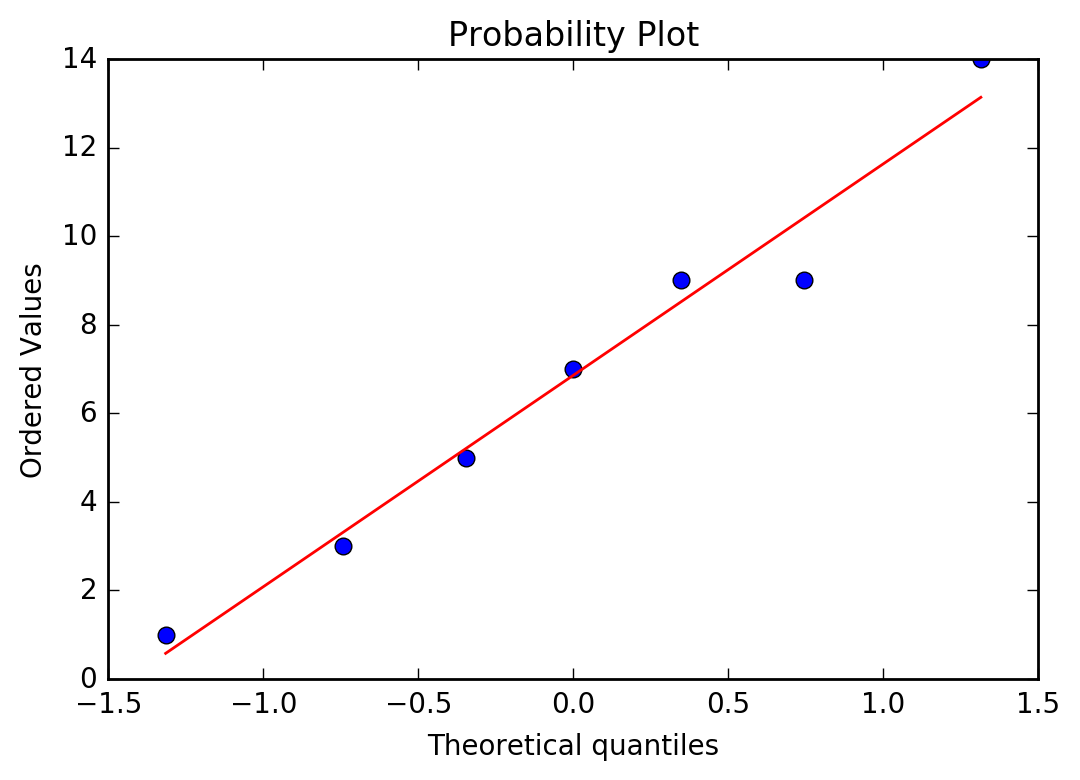

In [24]:
probplot(test_data, plot=plt);